<a href="https://colab.research.google.com/github/saif-byte/DataSciencePortfolio/blob/main/DataSciencePortfolio/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the prices of Cars


In this project, we have trained a model to predict the prices of cars. The dataset is collected from kaggle named as [Car Features and MSRP](https://www.kaggle.com/datasets/CooperUnion/cardataset). Each of the rows represent 15 attributes. Our target variable will be the price variable. 
We will use linear regression as our model to predict to train our model. 

##Reading and Preparing Data 

In [3]:
#importing neccessary libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#reading dataset
df = pd.read_csv("data.csv")

In [5]:
#checking number of rows in our dataset
len(df)

11914

In [6]:
#let us see some of our data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#There are some inconsistencies in column names , we have to remove them for clearity

#removing spaces and making all column names lowercase
df.columns = df.columns.str.lower().str.replace(' ','_') 
#getting columns that have contain values of object datatype
string_columns = list(df.dtypes[df.dtypes=='object'].index)
#to make values in columns consistent, all the columns having object type we will remove spaces and change to lower case
for col in string_columns:
  df[col]=df[col].str.lower().str.replace(' ','_')


In [8]:
df.head()
#now all the values and column names are consistent

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [9]:
#Now we can see that this ds contains multiple columns but we are interested in "msrp"
#"msrp" is our target var, we will predict price with this


##Target Variable Analysis

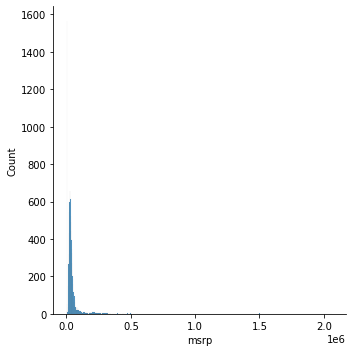

In [10]:
#first step will be to analyze the values of our target var. We can usually represent 
#values of our target var
sns.displot(df["msrp"], kde=False)

In [11]:
#we can see that our graph has a long tail , this means we have very few cars of higher prices 

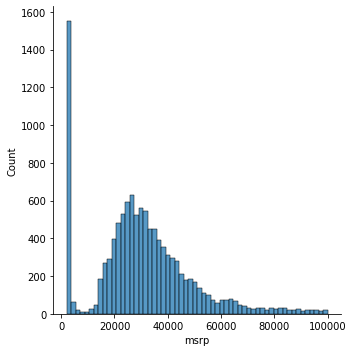

In [12]:
#we can have a closer look by
sns.displot(df.msrp[df.msrp<100000] , kde = False)

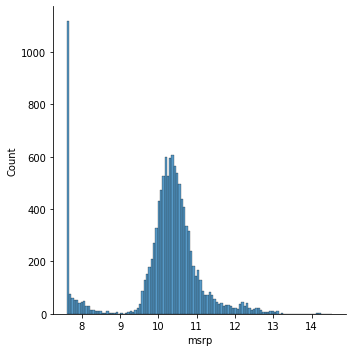

In [13]:
#the long tail makes difficult to see actual distribution, it also create effect on our learning model
#and it will not learn well.

#we can apply log distribution to avoid this problem
log_price = np.log1p(df.msrp)
sns.displot(log_price , kde=False)

In [14]:
#Now we can see that long tail is removed, and it is making a bell curve, even though the
#distribution is not normal due to large numbers of cars of lower prices 

##Checking for Missing Values in DataSet

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [16]:
#this is good because our target var has no null values, while market category has higher no. of null values

##Splitting Data into train, validation and test sets

In [17]:
#We will split into 20% validation , 20% test and 60% training set

In [18]:
n = len(df) 
#calculating no. of rows for train, test and validation sets
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+ n_test)

#fixing random seed so results are reproducible
np.random.seed(2)

#generating numpy array with indices 0 to n-1 and shuffling it 
idx = np.arange(n)
np.random.shuffle(idx)

#Using shuffled indexes to get shuffled dataset
df_shuffled = df.iloc[idx]

#Splitting shuffled df into train, test and spilit
df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_val = df_shuffled.iloc[n_train+n_val:].copy()


In [19]:
#now our data is shuffled and spilitted

In [20]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [21]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [22]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [23]:
#As we have seen in our analysis, we have long tail values, we have to apply log transformation 
#to our train,test and val dfs
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [24]:
#To avoid using target var accidentally , we delete them 
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']


##Regression - Linear Regression

###Linear regression implementation

In [25]:
def linear_regression(X,y):
  #adding dummy feature to X
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  #Using the formula to find weights
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  #returning base weight and individual weights
  return w[0],w[1:]

In [26]:
#As we have to predict the prices of car i.e. a number so we will use linear regression

In [27]:
#now we have to take some of the numerical features in df to form a matrx in order to train model
base = ["engine_hp", "engine_cylinders" , "highway_mpg","city_mpg","popularity"]
df_num = df_train[base] 
#some of the columns have missing values so we need to fill them
df_num = df_num.fillna(0)

In [28]:
#now we have to cchange our df to matrix
X_train = df_num.values

In [29]:
#getting the values for weights
w_0 , w = linear_regression(X_train , y_train)

In [30]:
#predicting the target values
y_pred = w_0 + X_train.dot(w)

##Evaluating the Model

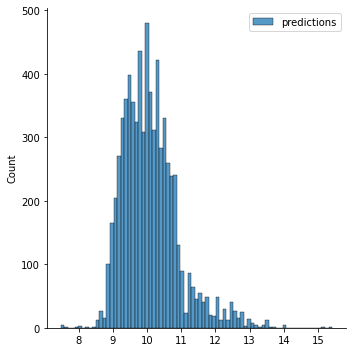

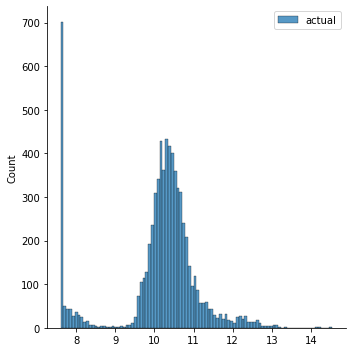

In [33]:
#Now to check how good we predicted values, we compare actual price and pred values
sns.displot(y_pred , label = "predictions")
plt.legend()
sns.displot(y_train , label = "actual")
plt.legend()


In [34]:
#We now calculate the error using root mean square method
#the implementation of rmse

def rmse(y , y_pred):
  error = y_pred-y
  mse = (error**2).mean()
  return np.sqrt(mse)
  

In [36]:
#Now we can use our rmse method to evaluate our model
rmse(y_train , y_pred)

0.7554192603920132

##Validating the model

In [37]:
#Now we need X_val to get predictions
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values


In [38]:
#to get predictions
y_pred = w_0 + X_val.dot(w)

In [39]:
#Now we use rmse function to evaluate our model on validation set
rmse(y_val , y_pred)

0.7359130757318697

## Simple Feature Engineering

In [40]:
#To improve our model we can add some more features to our model and see how well the model will be learned
#we now add the feature age 
#To calcluate age of each car ,  we first need to check the year in which data is collected
df["year"].max()

2017

In [86]:
#preparing the age feature
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df["age"] = 2017- df["year"]
  features.append("age")
  #preparing feature for categorical variables
  #num of doors
  for v in [2,3,4]:
    #for every num of door , creating new feature name
    feature = 'num_doors_%s'%v
    #now if the value in num of doors column is equal to v, we say true otherwise false. Also to take boolean values 1 or 0 we covert to int
    df[feature] = (df['number_of_doors']==v).astype(int)
    
    #appending to features list
    features.append(feature)

    #for car brands
  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s'%v
    df[feature] = (df["make"]==v).astype(int)
    features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']: 
    feature = 'is_type_%s' % v
    df[feature] = (df['engine_fuel_type'] == v).astype(int)
    features.append(feature)

  for v in ['automatic', 'manual', 'automated_manual']: 
    feature = 'is_transmission_%s' % v
    df[feature] = (df['transmission_type'] == v).astype(int)
    features.append(feature)

  for v in ['front_wheel_drive', 'rear_wheel_drive','all_wheel_drive', 'four_wheel_drive']: 
    feature = 'is_driven_wheels_%s' % v
    df[feature] = (df['driven_wheels'] == v).astype(int)
    features.append(feature)

  for v in ['crossover', 'flex_fuel', 'luxury','luxury,performance', 'hatchback']: 
    feature = 'is_mc_%s' % v
    df[feature] = (df['market_category'] == v).astype(int)
    features.append(feature)

  for v in ['compact', 'midsize', 'large']: 
    feature = 'is_size_%s' % v
    df[feature] = (df['vehicle_size'] == v).astype(int)
    features.append(feature)
    
  for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']: 
    feature = 'is_style_%s' % v
    df[feature] = (df['vehicle_style'] == v).astype(int)
    features.append(feature) 

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
    
  return X



In [87]:
#Now to validate
X_train = prepare_X(df_train)
w_0 , w = linear_regression(X_train, y_train)
#once our model is trained , we will compute predicted values
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

#Now we calculate rmse for our pred values
print("Validation: " , rmse(y_val , y_pred))


Validation:  53.95735163350136


In [88]:
#we can see that the validation improves significantly so age is an important feature in prediction of a car price

In [89]:
#we can also use graph to see how much our predictions have improved

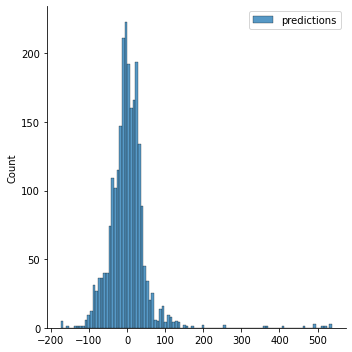

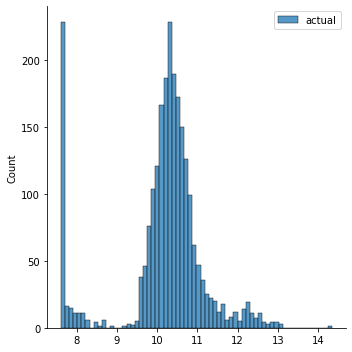

In [90]:
sns.displot(y_pred , label = "predictions")
plt.legend()
sns.displot(y_val , label = "actual")
plt.legend()


In [91]:
#We can now add more feature to further improve our model
#Now we have to add a categorical feature into our model


More features are added into prepare_X func, Check above

In [92]:
#Now let us see if our rmse has improved
X_train = prepare_X(df_train)
w_0 , w =linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation: " , rmse(y_val, y_pred))


validation:  53.95735163350136


instead of improving , it got worse, it is due to non-reguralize features

##Reguralization

###Linear Regression with reguralization

In [93]:
def linear_regression_reg(X,y,r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  #we calculate reguralize parameter
  reg = r*np.eye(XTX.shape[0])
  XTX = XTX+reg
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0] , w[1:]

In [97]:
#We now check how reguralization is effecting our weight values
for r in [0,0.001,0.01,0.1, 1, 10]:
  w_0 ,w = linear_regression_reg(X_train , y_train ,r)
  print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 8115744691019874.00, -7.10, -8115744691023588.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [95]:
#We can see as we increase value of r , our weights fall
#Now lets see how well our model learn with r = 0.001
X_train = prepare_X(df_train)
w_0 , w = linear_regression_reg(X_train , y_train , 0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation: ", rmse(y_val , y_pred))


Validation:  0.4571684843764242


our validation has improved from previous of 0.505 to 0.457

In [103]:
#let us check for multiple values for r
for r in [0.000001,0.0001,0.001,0.01,0.1, 1, 10]:
  w_0 , w = linear_regression_reg(X_train , y_train , r)
  X_val = prepare_X(df_val)
  y_pred = w_0 + X_val.dot(w)
  print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.45716678814813705
0.0001 0.4571671991047191
 0.001 0.4571684843764242
  0.01 0.4571813679271304
   0.1 0.45731356611711693
     1 0.45878622712147177
    10 0.47203906783072463


In [104]:
#We can see our values are good for smaller values of r, we will choose 0.001 as our final model

In [107]:
X_train = prepare_X(df_train)
w_0 , w = linear_regression_reg(X_train , y_train , 0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("Validation: ", rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print("Test: ", rmse(y_test, y_pred))

Validation:  0.4571813679271304
Test:  0.4602394963124682


As both values are so close , we can say that the model generalized the data well

##Real World Application

In [109]:
#Suppose a user put a ad with following specification of a Car on a Car selling Website
ad={
    'city_mpg': 18,
 'driven_wheels': 'all_wheel_drive',
 'engine_cylinders': 6.0,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'highway_mpg': 25,
 'make': 'toyota',
 'market_category': 'crossover,performance',
 'model': 'venza',
 'number_of_doors': 4.0,
 'popularity': 2031,
 'transmission_type': 'automatic',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'year': 2013
}
df_test = pd.DataFrame([ad]) 
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
#we will get the log value to bring it in original form

suggestion = np.expm1(y_pred)
suggestion

array([28294.13592946])

**Our model predicted the price to be \$28,294.13 while the original price is $31,120, So our model did a pretty good job in predicting the price**

Our final observation is that some attribues such as age of car, make of car and mpg value in city have higher impact on predicted values. 
We also reguralized our data for removing numerical instability. Though there are many features that were not included in our learned model , Using them will further increase the credibility of our model.
